Creating another variation on the initial data

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Train data needs params Data_Raw, train_data, X_train, y_train
# Test data needs params Data_Raw, test_data, X_test, y_test
def data_input(folder1, folder2, file_x, file_y):
    X = pd.read_csv(f"../Accident_Data_Preprocessing/{folder1}/{folder2}/{file_x}.csv")
    y = pd.read_csv(f"../Accident_Data_Preprocessing/{folder1}/{folder2}/{file_y}.csv")
    df = pd.concat([X, y], axis=1)
    return df
    

In [3]:
# TEST SET INPUT
#df = data_input("Data_Raw", "test_data", "X_test", "y_test")
#df.head()

In [4]:
# TRAIN SET INPUT
df = data_input("Data_Raw", "train_data", "X_train", "y_train")
df.head()

,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,A-1582799,Source2,2020-01-09 21:03:06,2020-01-09 21:30:52,38.909382,-76.725899,NaN,NaN,0.000,Accident on Pointer Ridge Dr at Philmont Ln.,...,False,False,False,False,False,Night,Night,Night,Night,2
1,A-480671,Source2,2017-06-08 08:01:59,2017-06-08 08:46:37,39.287880,-76.533447,NaN,NaN,0.000,Right hand shoulder closed due to accident on ...,...,False,False,False,False,False,Day,Day,Day,Day,3
2,A-259111,Source2,2016-07-14 17:13:19,2016-07-14 18:43:19,39.109459,-77.160103,NaN,NaN,0.000,Accident on MD-355 Frederick Rd at MD-355 Fred...,...,False,False,False,False,False,Day,Day,Day,Day,2
3,A-3629107,Source1,2017-06-13 07:14:33,2017-06-13 13:14:33,39.391690,-77.322670,39.39387,-77.3265,0.254,At MD-144/Exit 59 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2
4,A-3051370,Source2,2018-01-08 07:48:00,2018-01-08 08:16:31,39.387390,-77.143936,NaN,NaN,0.000,Accident on MD-808 Main St Northbound at Ellis...,...,False,False,False,False,False,Day,Day,Day,Day,2


## Drop columns unlikely to be useful

Too focused on timing or too fine grained or unique

In [5]:
df.columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [6]:
df.drop(["ID","Source","Country"],axis=1,inplace=True) # drop clearly unneeded columns

In [7]:
df["Zipcode"] = df.Zipcode.apply(lambda x: str(x).split("-")[0]) # fix zipcodes so that they are all 5 digit

In [8]:
df.drop(["End_Time","End_Lat","End_Lng"],axis=1,inplace=True) #can't know these things before it happens

In [9]:
df.drop(["Start_Lat","Start_Lng","State","City"],axis=1,inplace=True)# so much of location data is redundant and correlated

In [10]:
df.drop(["Timezone","Weather_Timestamp","Airport_Code","Description"],axis=1,inplace=True)

In [11]:
df.drop(["Start_Time","Zipcode","County"],axis=1,inplace=True)

## Street Type

In [12]:
df = df[~df.Street.str.contains("Francis Scott Key Bridge",na=False)|~df.Street.str.contains("Alexandria - Gaylord",na=False)]

In [13]:
print(df.Street.value_counts().shape)
df.Street.value_counts()

(6932,)


Street
I-95 S               4576
I-95 N               4543
Capital Beltway S    3238
Capital Beltway N    2608
Capital Beltway W    2340
                     ... 
Willow Vale Dr          1
 Lagoon Rd              1
Leakin St               1
Hudson Corner Rd        1
Sunset Blvd             1
Name: count, Length: 6932, dtype: int64

In [14]:
def nsew(x,r):
    if x[-1] in ["N","S","E","W"]:
        r= r+x[-1]
    return r

In [15]:
def street_type(x):
    if "Tunl" in x or "Tunnel" in x:
        return "Tunnel"#nsew(x,"Tunnel")
    if "I-" in x or "I " in x:
        return "Interstate"
    if " Dr " in x or " Ave " in x or " Rd " in x or " Xing" in x or " Way " in x:
        return "local"
    if "Beltway" in x:
        return "Beltway"
    if "US-" in x[:4] or "US " in x or "MD-" in x[:4] or "Expy" in x:
        return "Highway"
    if "Hwy" in x or "Fwy" in x or "Highway" in x or "Route" in x or "Connector" in x or "Byp" in x \
        or "Bypass" in x or "Gtwy" in x or "Brg" in x or "Trwy" in x or "Rt" in x or "Conn" in x or "Exp" in x \
        or "Thwy" in x:
        return "Highway"
    if x[-2:] in ["St","Pl","Dr","Sq"]:
        return "local"
    if "Ln" in x or "Rd" in x or "Ct" in x:
        return "local"
    if x[-3:] in ["Way","Cir","Ter","Trl","Plz","Aly","Grn","way","Ext"]:
        return "local"
    if x[-3:] in ["-A", "-B", "-11", "-33"]:
        return "on_off_ramp"
    if x[-1] in ["A", "B", "C"]:
        return "on_off_ramp"
    if "Ave" in x[-5:] or " Blvd" in x or " Pike" in x or "Pkwy" in x or "Crse" in x or "Alameda" in x:
        return "large_local"
    if "Garth" in x or "Spell" in x or "Psge" in x or "Chase" in x or "Cutoff" in x or "Spire" in x:
        return "local"
    if "Overlook" in x or "Battlefield" in x or "Cemetery" in x or "Park" in x or "Base" in x or "Concourse" in x \
        or "Memorial" in x or "Booth's" in x or "Bywy" in x or "Underground" in x:
        return "special"
    if "Loop" in x or "Greenway" in x or "West" in x or "ville" in x or "wood" in x:
        return "local"
    if "St" in x or "Mnr" in x or "Pass" in x or "Run" in x or "Mall" in x or "Row" in x or "Grv":
        return "local"
    return x

In [16]:
df["Street"] = df["Street"].astype(str)
df["Street"] = df.Street.apply(street_type)

In [17]:
df=df.loc[~df.Street.str.contains("special")]


In [18]:
df.Street.value_counts()
# added Intercounty conn as highway
# added rt 100 as highway
# added ocean city exp as highway
# byway as special
# added on_off_ramp
# aberdeen thwy as highway
# east c st 2 as local
# prettyman manor is trailer park, made local
# alexandria-gaylord is bridge, remove
# Urbana Church Pass is local
# olde mill run as local
# harriet tubman byway as special
# poncabird pass as local
# Thompson creek mall as local

Street
Interstate     31044
local          27926
Highway        20427
large_local    19255
Beltway        11484
Tunnel          1747
on_off_ramp      351
Name: count, dtype: int64

## Weather Condition

In [19]:
df["Weather_Condition"].value_counts()

Weather_Condition
Fair                       31032
Cloudy                     14474
Mostly Cloudy              11882
Partly Cloudy               7967
Clear                       7487
                           ...  
Thunder / Windy                2
Squalls / Windy                1
Showers in the Vicinity        1
Heavy Ice Pellets              1
Light Snow Shower              1
Name: count, Length: 70, dtype: int64

In [20]:
df = df.loc[(df.Weather_Condition != "Sand")] # too few values

In [21]:
# missing values count as a float
# change to "unknown" instead. Later we can decide if we want to keep
df["Weather_Condition"] = df["Weather_Condition"].fillna("unknown")

In [22]:
df["Weather_Condition"] = df["Weather_Condition"].apply(lambda x: "None" if "N/A" in x else x)

In [23]:
df["Weather_Condition"]=df["Weather_Condition"].apply(lambda x: "Windy" if "Windy" in x else x)

In [24]:
def mapping_1(x):
    tomap = {"Light Drizzle":"Drizzle",
            "Light Rain with Thunder":"Light Thunderstorms and Rain",
            "Thunder in the Vicinity":"Thunder",
            "Heavy Drizzle":"Rain",
            "Mist":"Fog",
            "Light Freezing Drizzle":"Light Freezing Rain"}
    if x in tomap:
        return tomap[x]
    return x

In [25]:
def mapping_2(x):
    tomap = {"Light Rain Shower":"Drizzle",
             "Light Rain":"Drizzle",
            "Light Ice Pellets":"Ice Pellets",
            "Shallow Fog":"Fog"}
    if x in tomap:
        return tomap[x]
    return x

In [26]:
def mapping_3(x):
    tomap = {"Heavy Ice Pellets":"Ice Pellets",
            "Drizzle and Fog":"Fog",
            "Patches of Fog":"Fog",
            "Heavy Snow":"Snow",
            "Heavy Thunderstorms and Rain":"Thunderstorms",
            "T-Storm":"Thunderstorms",
            "Heavy T-Storm":"Thunderstorms",
            "Thunderstorms and Rain":"Thunderstorms"}
    if x in tomap:
        return tomap[x]
    return x

In [27]:
def mapping_4(x):
    tomap = {"Light Snow Shower":"Snow",
            "Light Snow":"Snow",
            "Light Rain Showers":"Drizzle",
            "Light Thunderstorms and Rain":"Thunderstorms"}
    if x in tomap:
        return tomap[x]
    return x

In [28]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_1)                        

In [29]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_2)

In [30]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_3)

In [31]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_4)

In [32]:
df.Weather_Condition.value_counts()

Weather_Condition
Fair                       31032
unknown                    21445
Cloudy                     14474
Mostly Cloudy              11882
Partly Cloudy               7967
Clear                       7487
Overcast                    4753
Drizzle                     4363
Scattered Clouds            2529
Snow                        1431
Fog                         1269
Rain                        1117
Windy                        835
Wintry Mix                   335
Heavy Rain                   299
Haze                         288
Thunderstorms                265
Thunder                      115
Light Freezing Rain          110
Snow and Sleet                46
None                          33
Ice Pellets                   25
Thunderstorm                  23
Small Hail                    23
Sleet                         20
Light Sleet                   17
Heavy Sleet                   11
Light Snow and Sleet           9
Hail                           9
Light Freezing Fog       

None and Light Sleet have almost no rows will values, drop them.
Light Freezing Fog has 10 rows. Change to Fog.
Leave others for now. Will need to decide if further combinations are necessary.

In [33]:
df = df.loc[(df.Weather_Condition != "None") & (df.Weather_Condition != "Light Sleet")]

In [34]:
df=df.reset_index(drop=True)

In [35]:
df.shape

(112182, 29)

## Wind Direction

In [36]:
# Can decide later whether to keep or remove rows with unknown values
df["Wind_Direction"] = df.Wind_Direction.fillna("unknown")

In [37]:
df.Wind_Direction.value_counts()

Wind_Direction
CALM        17953
unknown     16117
WNW          6640
North        6257
NW           6089
Calm         5931
S            5118
W            4922
NNW          4571
SSW          4154
N            3725
SW           3457
SSE          3239
WSW          2906
SE           2902
NNE          2815
NE           2602
ENE          2397
E            2200
ESE          2096
West         1748
VAR          1693
South        1309
East          799
Variable      542
Name: count, dtype: int64

In [38]:
# Basic cleanup of alternative spellings
def wind_map(x):
    tomap = {"CALM":"Calm","South":"S","West":"W","North":"N","East":"E","VAR":"Variable"}
    if x in tomap:
        return tomap[x]
    return x

In [39]:
# Less fine grained values
def wind_2(x):
    tomap = {"WNW":"NW","NNW":"NW","SSW":"SW","SSE":"SE","WSW":"SW","NNE":"NE","ENE":"NE","ESE":"SE"}
    if x in tomap:
        return tomap[x]
    return x

In [40]:
df["Wind_Direction"] = df.Wind_Direction.apply(wind_map)

In [41]:
df["Wind_Direction"] = df.Wind_Direction.apply(wind_2)

In [42]:
df.Wind_Direction.value_counts()

Wind_Direction
Calm        23884
NW          17300
unknown     16117
SW          10517
N            9982
SE           8237
NE           7814
W            6670
S            6427
E            2999
Variable     2235
Name: count, dtype: int64

## Missing Values: drop columns

In [43]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [44]:
df.shape

(112182, 29)

In [45]:
df.isna().sum()

Distance(mi)                 0
Street                       0
Temperature(F)           12540
Wind_Chill(F)            38000
Humidity(%)              12625
Pressure(in)             11580
Visibility(mi)           21895
Wind_Direction               0
Wind_Speed(mph)          27366
Precipitation(in)        39590
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset             232
Civil_Twilight             232
Nautical_Twilight          232
Astronomical_Twilight      232
Severity                     0
dtype: int64

In [46]:
# half of the rows are missing wind chill. Better to just drop the column
df.drop(["Wind_Chill(F)"],axis=1,inplace=True)

In [47]:
# half of the rows are missing precipitation, and weather condition already
# covers that situation more or less. So drop
df.drop(["Precipitation(in)"],axis=1,inplace=True)

<Axes: >

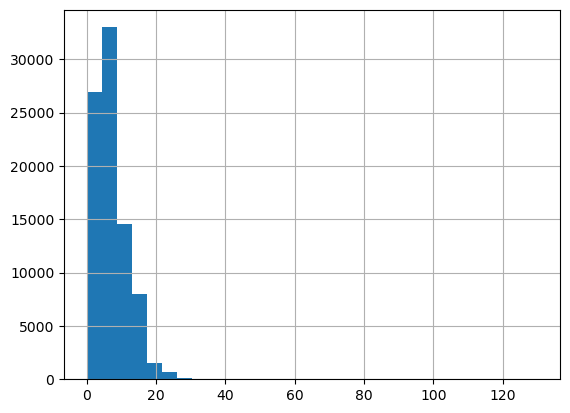

In [48]:
df["Wind_Speed(mph)"].hist(bins=30)

In [49]:
df[df["Wind_Speed(mph)"] > 40].shape[0]

17

Wind speed has a significant number of missing values. It is also a fairly tight distribution other than 11 values that are larger. Although wind speed could be useful in predicting severity, it may not be worth keeping in this situation. I think we try without it first.

In [50]:
df.drop(["Wind_Speed(mph)"],inplace=True,axis=1)

In [51]:
df.isna().sum()

Distance(mi)                 0
Street                       0
Temperature(F)           12540
Humidity(%)              12625
Pressure(in)             11580
Visibility(mi)           21895
Wind_Direction               0
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset             232
Civil_Twilight             232
Nautical_Twilight          232
Astronomical_Twilight      232
Severity                     0
dtype: int64

In [52]:
df.dropna().shape

(89028, 26)

It looks like dropping NA values doesn't remove too many rows, there must be rows with multiple NA values. So let's drop NA rows.

In [53]:
df.dropna(inplace=True)

## Twilights

We don't need four different twilights.

In [54]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [55]:
df.drop(['Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight'],inplace=True,axis=1)

## Any columns have too little info?

In [56]:
for col in ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop']:
    print(df[col].value_counts())

Amenity
False    88516
True       512
Name: count, dtype: int64
Bump
False    89011
True        17
Name: count, dtype: int64
Crossing
False    83751
True      5277
Name: count, dtype: int64
Give_Way
False    88798
True       230
Name: count, dtype: int64
Junction
False    78197
True     10831
Name: count, dtype: int64
No_Exit
False    88899
True       129
Name: count, dtype: int64
Railway
False    88842
True       186
Name: count, dtype: int64
Roundabout
False    89026
True         2
Name: count, dtype: int64
Station
False    88074
True       954
Name: count, dtype: int64
Stop
False    87987
True      1041
Name: count, dtype: int64
Traffic_Calming
False    88727
True       301
Name: count, dtype: int64
Traffic_Signal
False    78961
True     10067
Name: count, dtype: int64
Turning_Loop
False    89028
Name: count, dtype: int64


Bump, Give_Way, No_Exit, Roundabout, have almost no True values, so drop.
All values in Turning_Loop are identical, so drop.

In [57]:
df.drop(['Bump', 'Give_Way', 'No_Exit', 'Roundabout','Turning_Loop'],inplace=True,axis=1)

Will need to consider if it is worth keeping all of these or combining in some way.

In [58]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Severity'],
      dtype='object')

In [59]:
df.shape

(89028, 18)

In [60]:
df.head(50)

,Distance(mi),Street,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Severity
0,0.000,local,30.0,55.0,30.66,10.0,Calm,Fair,False,False,False,False,False,False,False,False,Night,2
2,0.000,Highway,95.0,44.0,29.89,10.0,W,Partly Cloudy,False,True,False,False,False,False,False,False,Day,2
3,0.254,Highway,71.6,88.0,30.05,10.0,Calm,Clear,False,False,False,False,False,False,False,False,Day,2
4,0.000,local,17.6,49.0,30.26,10.0,Calm,Clear,False,False,False,False,False,False,False,False,Day,2
5,0.078,local,79.0,33.0,30.12,10.0,W,Fair,False,False,False,False,False,False,False,False,Day,2
8,0.159,Interstate,70.0,49.0,30.26,7.0,Calm,Fair,False,False,False,False,False,False,False,False,Night,2
10,0.042,local,82.0,49.0,29.97,10.0,NW,Partly Cloudy,False,True,False,False,False,False,False,True,Day,2
11,0.075,Highway,52.0,93.0,29.80,6.0,NW,Drizzle,False,False,False,False,False,False,False,False,Night,2
13,0.369,large_local,79.0,74.0,29.21,10.0,Calm,Fair,False,False,False,False,False,False,False,True,Day,3
14,0.000,Highway,48.0,50.0,29.64,10.0,NW,Fair,False,False,True,False,False,False,False,False,Night,3


In [61]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Severity'],
      dtype='object')

In [62]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(89028, 18)
(81172, 18)


In [63]:
df.head()

,Distance(mi),Street,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Severity
0,0.000,local,30.0,55.0,30.66,10.0,Calm,Fair,False,False,False,False,False,False,False,False,Night,2
2,0.000,Highway,95.0,44.0,29.89,10.0,W,Partly Cloudy,False,True,False,False,False,False,False,False,Day,2
3,0.254,Highway,71.6,88.0,30.05,10.0,Calm,Clear,False,False,False,False,False,False,False,False,Day,2
4,0.000,local,17.6,49.0,30.26,10.0,Calm,Clear,False,False,False,False,False,False,False,False,Day,2
5,0.078,local,79.0,33.0,30.12,10.0,W,Fair,False,False,False,False,False,False,False,False,Day,2


In [64]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Severity'],
      dtype='object')

In [65]:
# Train data needs Data_Cleaned, train_data, X_train_control, y_train_control
# Test data needs Data_Cleaned, test_data, X_test_control, y_test_control
def data_output(df, folder1, folder2, file_x, file_y):
    col_class = ['Class']
    col_data = ['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
                'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
                'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
                'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset']

    df = df.rename(columns={'Severity' : 'Class'})
    df = df.drop_duplicates()

    X = df.iloc[:,:-1]
    y = df.Class

    X.to_csv(f'../Accident_Data_Preprocessing/{folder1}/{folder2}/{file_x}.csv', columns = col_data, index = False)
    y.to_csv(f'../Accident_Data_Preprocessing/{folder1}/{folder2}/{file_y}.csv', columns = col_class, index = False)

In [66]:
# TRAIN OUTPUT
data_output(df, "Data_Cleaned", "train_data", "X_train_control", "y_train_control")

In [67]:
# TEST OUTPUT
#data_output(df, "Data_Cleaned", "test_data", "X_test_control", "y_test_control")